In [1]:
from tensorflow import keras
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

2024-04-03 11:49:59.399286: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-03 11:49:59.421527: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-03 11:49:59.421550: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-03 11:49:59.422254: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-03 11:49:59.426090: I tensorflow/core/platform/cpu_feature_guar

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

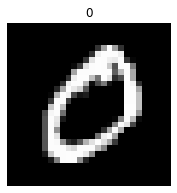

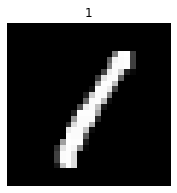

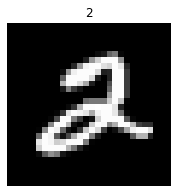

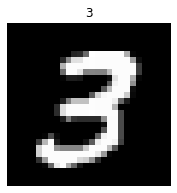

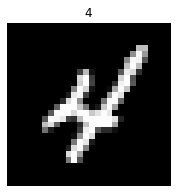

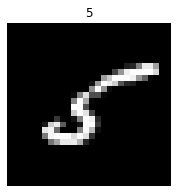

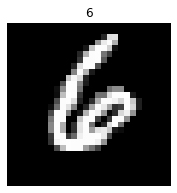

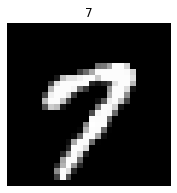

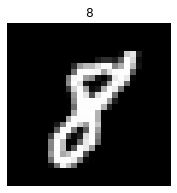

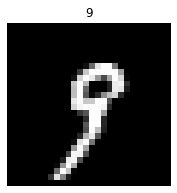

In [4]:
i, k = 0, 0
while k < 10:
    if y_train[i] == k:
        plt.figure(figsize=(4, 3))
        plt.imshow(X_train[i], cmap='gray')
        plt.axis('off')
        plt.title(y_train[i])
        k += 1
        i += 1
        plt.show()
    else:
        i += 1

In [5]:
# X_train = X_train[:5000]
# X_test = X_test[:5000]
# y_train = y_train[:5000]
# y_test = y_test[:5000]

In [6]:
X_train = X_train/255.0
X_test = X_test/255.0

In [7]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1) 
X_test= X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1) 
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [8]:
X_train.shape

(60000, 28, 28, 1)

In [9]:
# Data augmentation
datagen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=5,
    zoom_range = 0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    validation_split=0.2
)

# Model
model = keras.models.Sequential([
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(64, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.1),
    
    keras.layers.Dense(10, activation='softmax')    
])

# Learning rate reduction
learning_rate_reduction = keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.000001)

# Early stopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, mode='min')

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=32, subset='training'),
                    epochs = 50, validation_data = datagen.flow(X_train, y_train, batch_size=32, subset='validation'),
                    callbacks=[learning_rate_reduction, early_stopping])


2024-04-03 11:50:01.090268: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-03 11:50:01.116275: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-03 11:50:01.116390: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Epoch 1/50


2024-04-03 11:50:02.713334: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f2ef5445ab0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-04-03 11:50:02.713356: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Ti, Compute Capability 8.6
2024-04-03 11:50:02.716848: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1712125202.771596 2878470 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1500/1500 [==============================] - 8s 4ms/step - loss: 0.2031 - accuracy: 0.9394 - val_loss: 0.1000 - val_accuracy: 0.9688 - lr: 0.0010
Epoch 2/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0884 - accuracy: 0.9730 - val_loss: 0.0689 - val_accuracy: 0.9787 - lr: 0.0010
Epoch 3/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0728 - accuracy: 0.9781 - val_loss: 0.1066 - val_accuracy: 0.9697 - lr: 0.0010
Epoch 4/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0644 - accuracy: 0.9807 - val_loss: 0.0657 - val_accuracy: 0.9790 - lr: 0.0010
Epoch 5/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0542 - accuracy: 0.9835 - val_loss: 0.0592 - val_accuracy: 0.9812 - lr: 0.0010
Epoch 6/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0518 - accuracy: 0.9843 - val_loss: 0.0539 - val_accuracy: 0.9834 - lr: 0.0010
Epoch 7/50
1500/1500 [==============================] - 6s 4ms/step -

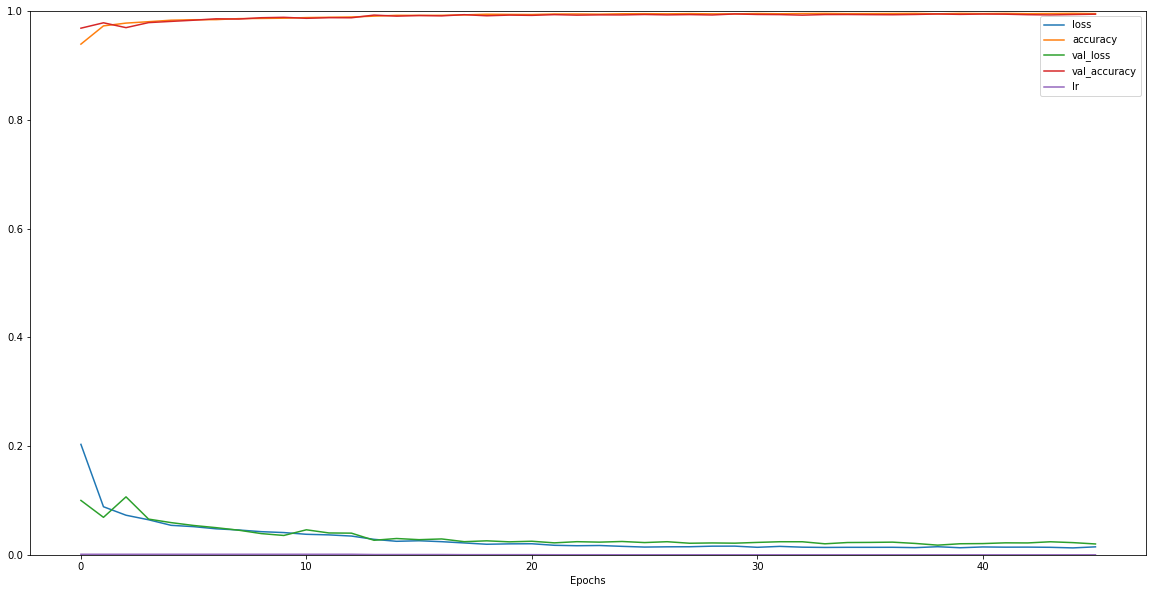

In [10]:
plt.figure(figsize=(20,10))
for k, v in history.history.items():
    plt.plot(v, label=k)
plt.gca().set_ylim(0,1)
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [11]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test Loss: ',  test_loss)
print('Test Accuracy: ',  test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0142 - accuracy: 0.9956
Test Loss:  0.014243950136005878
Test Accuracy:  0.9955999851226807


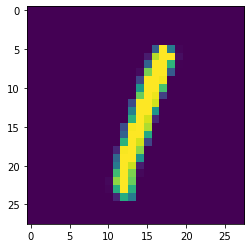

In [12]:
img = X_test[5]
plt.imshow(img)

In [13]:
img = np.expand_dims(img, axis=0)
img.shape

(1, 28, 28, 1)

In [14]:
np.argmax(model.predict(img))

1/1 [==============================] - 0s 95ms/step


1